# Лабораторная работа №3

In [14]:
# подключить модуль
import math as m
import cmath as cmath
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
from pylab import *

### Функции для раздела «Производная»

#### Функция tangent()

In [3]:
def tangent(y, x0):
    '''' Строит уравнение касательной
        к графику функции у(х) в точке
        с абсциссой х0 '''
    ''' (х0;у0) - точка касания '''
    y0 = y.subs(x, x0)

    ''' Касательная с уравнением у = kx+b
        проходит через точку М(х0;у0), а также
        через точку N(x0+l;y0+k) (к -
        угловой коэффициент)'''
    x1 = x0 + 1
    
    ''' Производная функции у при х=х0 '''
    k = diff(y,x).subs(x,x0)
    y1 = y0 + k

    ''' Касательная - это прямая, проходящая
    через точки М и N'''
    return Line((x0,y0), (x1,y1))

#### Функция critical_points_conditional()

In [43]:
def critical_points_conditional(f, g):
    ''' Нахождение критических точек
    функции Лагранжа L
    и определителя Delta
    f - целевая функция, g - условие '''
    
    ''' Функция Лагранжа '''
    lam = symbols('lam')
    L = f + lam*g
    
    ''' Производные 1-го порядка '''
    gradL = [diff(L,c) for c in [x,y]]
    
    ''' Производная no lam совпадает eg '''
    ''' Набор производных '''
    eqs = gradL + [g]
    
    ''' Ищем критические точки, приравнивая производные к нулю '''
    cr_point = solve(eqs, [x, y, lam], dict=True)
    
    ''' Производные функции g '''
    g_x = diff(g,x)
    g_y = diff(g,y)
    
    ''' Производные 2-го порядка '''
    L_xx = diff(L,x,2)
    L_xy = diff(L,x,y)
    L_yy = diff(L,y,2)
    
    ''' Определитель D '''
    M = Matrix([[0,g_x,g_y], [g_x,L_xx, L_xy], [g_y,L_xy,L_yy]])
    D = -det(M)
    
    return cr_point, D

#### Функция critical_points()

In [34]:
def critical_points(z):
    ''' Нахождение критических точек
    функции двух переменных z
    и величин А и Delta '''
    ''' Производные 1-го порядка '''
    z_x = diff(z,x)
    z_y = diff(z,y)
    
    ''' Ищем критические точки,
    приравнивая производные к нулю '''
    cr_point = solve([z_x, z_y], [x, y], dict=True)
    
    ''' Производные 2-го порядка '''
    A = diff(z,x,2)
    B = diff(z,x,y)
    C = diff(z,y,2)
    
    ''' Delta '''
    D = A*C - B**2
    
    return cr_point, A, D

#### Функция suff_indic()

In [6]:
def suff_indic(A, D, cr_point):
    ''' А и D - функции двух переменных, cr_point - словарь '''
    A0 = A.subs(cr_point)
    D0 = D.subs(cr_point)
    return D0, A0

## Решение задач на Python

### Математический анализ, Производная

### Пример 1: Производная функции у = xcosx: $ y' = (x\cos x)' = \cos x - x\sin x $

In [30]:
''' Объявление символьной переменной '''
x = symbols('x')
            
''' Функция у(х) '''
y = x * cos(x)
            
''' Вычисление производной '''
diff(x * cos(x), x)

-x*sin(x) + cos(x)

### Пример 2: Производная 3-го порядка функции $y=\ln x$ </br>
&nbsp;&nbsp;&nbsp;&nbsp; $ (\ln x)^{(3)}=\frac{2}{x^{3}}.$

In [16]:
x = symbols('x')
y = x * cos(x)

diff(log(x), x, 3) # либо diff(log(x), x, x, x)

2/x**3

### Пример  3: Найти значение $y''(10)$ для функции $t = \lg^{3}(x^{3})$.

In [17]:
x = symbols('x')
y = log(x**3,10)**3

diff(y,x,2).subs(x,10)

-9*(-6 + log(1000))*log(1000)/(100*log(10)**3)

В некоторых случаях более простое выражение для ответа можно получить, применяя метод simplify ().

In [20]:
x = symbols('x')
y = log(x**3, 10)**3

diff(y,x,2).subs(x,10).simplify()

81*(2 - log(10))/(100*log(10)**2)

### Пример  4: Решить уравнение $y'= 0$, где $y(x) = \frac{x^{2}+x-6}{x^{2}-10x+25}$

In [24]:
x = symbols('x')

''' Производная: '''
y = (x**2+x-6)/(x**2-10*x+25)
z = diff(y,x)
z

(10 - 2*x)*(x**2 + x - 6)/(x**2 - 10*x + 25)**2 + (2*x + 1)/(x**2 - 10*x + 25)

In [26]:
''' Решение уравнения '''
solve(z, x)

[7/11]

### Пример  5: Наити первую производную $\frac{dy}{dx}$ и вторую производную для функции, заданной неявно в виде уравнения: $x^{2}+y^{2}=4$.

Решение. Имеем: $F(x, y)=x^{2}+y^{2}-4; y'=\frac{F'x}{F'y}=-\frac{2x}{2y}=-\frac{x}{y}$

In [43]:
x, y = symbols('x y')
f = x**2 + y**2 - 4
idiff(f, y, x)

-x/y

Вторая производная.

In [44]:
x, y = symbols('x y')
f = x**2 + y**2 - 4
idiff(f, y, x, 2)

(-x**2/y - y)/y**2

### Пример  6: Найти $y'_{x}$ и $y''_{xx}$ для функции, заданной в параметрической форме:</br></br>
$
\left\{\begin{matrix}
x = t - \sin t, \\
y = 1 - \cos t.
\end{matrix}\right.
$

Для решения используем формулы, выражающие производную функции по переменной $х$ через обычные производные по переменной $t$:</br></br>

<div style="text-align: center;"> <font size=5>$ y'_{x} = \frac{y'_{t}}{y'_{t}}=\frac{\sin t}{1-\cos t}; y''=\frac{(y'_{x})'_{t}}{x'_{t}}=\frac{1}{1-\cos t} $</font></div>

In [50]:
t = symbols('t')

x = t - sin(t)
y = 1 - cos(t)

In [ ]:
''' Первая производная '''
y_diff = diff(y,t)/diff(x,t)
y_diff

In [ ]:
''' Вторая производная '''
y_2diff = diff(y_diff, t)/diff(x, t)
y_2diff.simplify()

### Пример  7:  Найти левую и правую производные функции $f(x)$ в точке ее разрыва, если</br></br>
$
f(x) = 
\left\{\begin{matrix}
\mathrm{arctg}\left(\frac{1}{x}\right), & x \neq0 \\
-\frac{\pi}{2}, & x = 0. 
\end{matrix}\right.
$</br>
</br>
Решение. Точкой разрыва является значение $х = 0$. График функции:

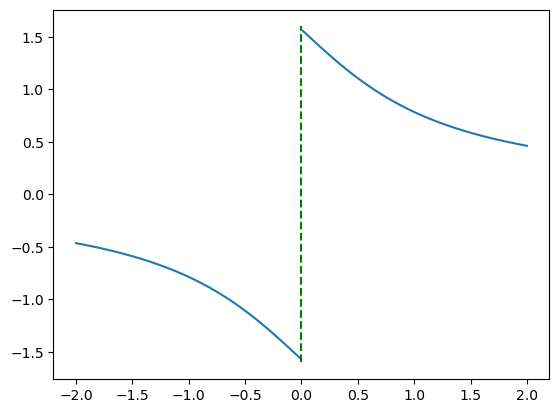

In [55]:
''' Построим график с учетом того, что функция не существует в точке x=0 '''
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
x = np.linspace(-2,2,500)

''' В узкий интервал около нуля записываем значения NaN '''
x[(x>-0.01) & (x < 0.01)] = np.nan
y = np.arctan(1/x)

plt.plot(x,y)
plt.vlines(0, -1.6, 1.6, color='g', linestyles='dashed')
plt.show()

Найдем выражение для производной, а затем для полученного выражения вычислим пределы слева и справа при $x \to 0$

In [59]:
''' Производная '''
x = symbols('x')
y = atan(1 / x)
z = diff(y, x)

In [62]:
''' Значение производной в точке х = 0 слева '''
limit(z, x, 0, dir='+')

-1

In [61]:
''' Значение производной справа '''
limit(z, x, 0, dir="+")

-1

### Пример 8:  Найти наибольшее и наименьшее значения функции $f(х)$ на отрезке
$f(x)=^{3}\sqrt{2(x+1)^{2}(5-x)}-2; x \in [-3;3]$

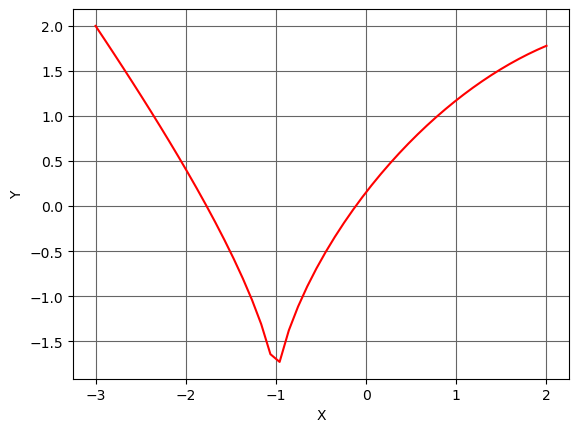

In [160]:
''' График функции на заданном отрезке '''
fun = lambda x: np.cbrt(2*(x+1)**2*(5-x)) - 2
х = np.linspace(-3, 3, 100)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, fun(x), 'r')
plt.grid(True, linestyle='-', color='0.4')
plt.show()

Внутри отрезка $[-3;3]$ единственный экстремум (минимум). Находим его

In [163]:
# 1.
res = minimize(fun, -1.5)
print('x_min: %.3f' % res.x)

x_min: -0.490


Это явно неверное решение. В точке $x = - 1$ функция имеет бесконечную производную и сходимость решений очень медленная. 
Возьмем начальное значение, близкое к предполагаемому значению

In [165]:
res = minimize(fun, -1.001)
print('xmin: %.3f' % res.x)

xmin: -1.001


Предполагая, что точное решение: $х = -1$, возьмем его в качестве начального значения.

In [168]:
res = minimize(fun, -1.0)
print('x_min: %.3f' % res.x)

x_min: -1.000


In [172]:
''' 1. Значение функции в точке минимума: '''
fun(res.x)

array([-2.])

In [173]:
''' 2. Значения функции на концах отрезка : '''
print('у(-З): %.3f у(3): %.3f' % (fun(-3), fun(3)))

у(-З): 2.000 у(3): 2.000


Ответ:</br> 
наименьшее значение:$-2$, </br> 
наибольшее значение: $2$.

### Пример  9:  Найти точки перегиба и исследовать характер выпуклости кривой $y = x^{4}(12\ln x - 7)$

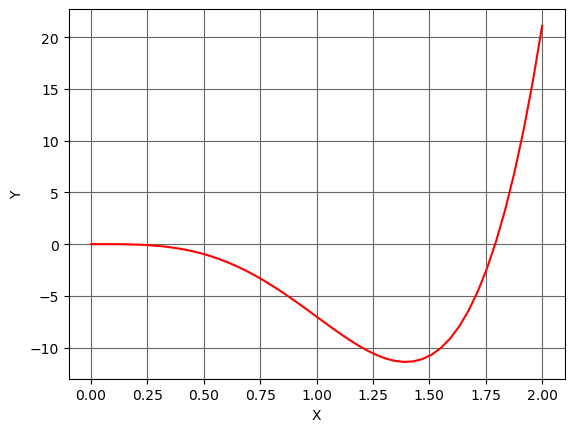

In [175]:
f = lambda х: х**4 * (12*np.log(x) - 7)
x = np.linspace(0.001,2,50)
plt.plot(x, f(x), 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle='-', color='0.4')
plt.show()

In [178]:
x = symbols('x')
y = x**4 * (12*log(x) - 7)

''' Вычисляем вторую производную '''
y_2deriv = diff(y,x,2)
y_2deriv

144*x**2*log(x)

In [180]:
''' Находим корни второй производной '''
x_inflex = solve(y_2deriv, x)
x_inflex

[0, 1]

$x = 0$ находится на границе области определения функции. </br>
Точка перегиба: $х = 1.$ Это можно заключить и из графика. Но можно и
проверить, что третья производная отлична от нуля.

In [182]:
diff(y,x,3).subs(x, 1)

144

Характер выпуклости определяем по графику, или используем признак: если вторая производная отрицательна во всех точках интервала, то в этом интервале функция выпукла вверх; если положительна - выпукла вниз.

In [184]:
print('слева: %.1f справа: %.1f' % (y_2deriv.subs(x,0.9), y_2deriv.subs(x,1.1)))

слева: -12.3 справа: 16.6


На интервале $(0;1) $ - выпукла вверх, на интервале $(1;\infty)$ - выпукла вниз

### Пример 10: Вычислить градиент функции $ z = 5\ln(x^{2}+y^{2})$ в точке $М(1;2)$.

In [11]:
x,y = symbols('x y')
z = 5*log(x**2 + y**2)
z_x = diff(z,x).subs({x:1, y:2})
z_y = diff(z,y).subs({x:1, y:2})
grad_f = (z_x, z_y)
grad_f

(2, 4)

### Пример  11: Определить направление I быстрейшего возрастания функции $z = x^2 + xy + 7$ в точке $М(1; —1)$.

Решение. Направление быстрейшего возрастания функции в точке М определяется градиентом функции, вычисленным в этой точке.

In [17]:
x, y = symbols('x y')
z = x**2 + x*y +7
z_x = diff(z,x).subs({x:1, y:-1})
z_y = diff(z,y).subs({x:1, y:-1})
grad_f = (z_x, z_y)
grad_f

(1, 1)

Градиентом является вектор $i + j$, следовательно, искомое направление $l$ составляет угол $45^{о}$ с осью $Ox$.

### Пример 12:  Провести касательную плоскость и нормаль к сфере $x^{2}+y^{2}+z^{2} = 3$ в точке $М(1;1;1)$.


In [35]:
# Функции для раздела «Производная»: tangent_plane()
def tangent_plane(F,M):
    ''' Находит уравнение касательной плоскости
    и нормали к поверхности F(x,y,z) в точке M '''
    
    ''' Частные производные в точке М '''
    F_diff_x = diff(F,x).subs({x:M.x, y:M.y, z:M.z})
    F_diff_y = diff(F,y).subs({x:M.x, y:M.y, z:M.z})
    F_diff_z = diff(F,z).subs({x:M.x, y:M.y, z:M.z})
    
    ''' Нормальный вектор плоскости '''
    n = Point(F_diff_x, F_diff_y, F_diff_z)
    
    ''' Касательная плоскость проходит через точку M с нормальным вектором n '''
    p = Plane(M, normal_vector=n).equation()
    
    ''' Нормаль проходит через точку M и точку K = M + n '''
    K = Point(M.x+n.x, M.y+n.y, M.z+n.z)
    l_n = Line(M, K).arbitrary_point()
    
    return p, l_n

In [ ]:
x, y, z = symbols('x у z')

''' Уравнение сферы '''
F = x**2 + y**2 + z**2 - 9
M = Point(1,1,1)

p, l_n = tangent_plane(F,M)

In [91]:
''' Касательная плоскость '''
p

2*x + 2*y + 2*z - 6

In [88]:
''' Нормаль '''
l_n

Point3D(2*t + 1, 2*t + 1, 2*t + 1)

### Пример 13:   Определить коэффициенты эластичности производственной функции Кобба-Дугласа $z = 4.5x^{0.33}y^{0.66}$

In [21]:
x,y = symbols('x y')

''' Частные производные: '''
z = 4.5*x**(0.33) * y**(0.66)
z_x = diff(z, x)
z_y = diff(z, y)

''' Коэффициенты эластичности '''
E_x = (x/z)*z_x
E_y = (y/z)*z_y

print('E_x: %.2f E_y: %.2f' % (E_x, E_y))

E_x: 0.33 E_y: 0.66


### Пример  14:  Зависимость объема выпуска продукции $V$ от капитальных затрат К определяется функцией $V = V_{0}\ln(5 + К^{2})$. Найти интервал изменения $К$, на котором увеличение капитальных затрат неэффективно.

Решение. </br>
Найдем точку перегиба функции $V(K)$. Достаточный признак точки перегиба: вторая производная функции в этой точке обращается в ноль, а третья производная отлична от нуля.

In [24]:
from sympy import *

K,V0 = symbols('K V0')
V = V0*log(5+K**2)

''' Вторая производная '''
Vprim2 = diff(V,K,2)

''' Третья производная '''
Vprim3 = diff(V,K,3)

''' Корни второй производной  '''
s = solve(Vprim2,K)
s

[-sqrt(5), sqrt(5)]

Подходит положительный корень $K_{0} = s[1] = \sqrt{5}$.</br>
Значение третьей производной в этой точке:

In [27]:
Vprim3.subs(K,s[1])

-sqrt(5)*V0/25

Ответ: Увеличение капитальных затрат неэффективно при значениях $ K > \sqrt{5}$

## Примеры решения задач

### Пример  1: Вычислить $y'$ для функции $x\cos(\ln(x))+\sin(\ln(x)))$

In [15]:
x = sp.symbols('х')
y = x*(sp.cos(sp.log(x))+sp.sin(sp.log(x)))
sp.diff(y,x)

х*(-sin(log(х))/х + cos(log(х))/х) + sin(log(х)) + cos(log(х))

In [79]:
diff(y,x).simplify()

2*cos(log(х))

### Пример  5: Решить уравнение $y'(x) = 0$, где $y(x) = max\{x^2-2x+3; 2x^2-5x-1\}$

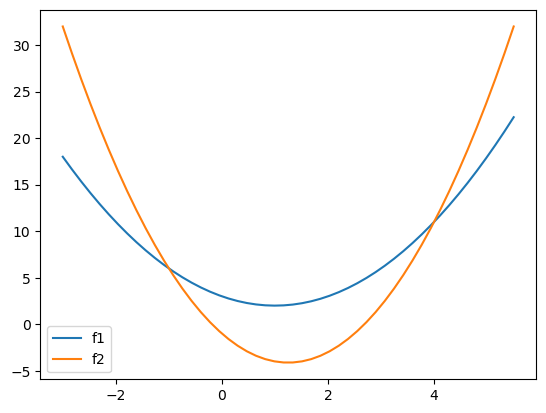

In [10]:
f1 = lambda х: х**2-2*х+3
f2 = lambda х: 2*х**2-5*х-1
x = np.linspace(-3, 5.5, 50)
y1 = f1(x)
plt.plot(x,y1, label = "f1")
y2 = f2(x)
plt.plot(x,y2, label = "f2")
plt.legend()
plt.show()

In [81]:
f1(-1) == f2(-1)

True

In [7]:
f1(-1) == f2(-1)

True

In [8]:
x = symbols('x')
f1 = x**2-2*x+3
f2 = 2*x**2-5*x-1

y_diff1 = diff(f2,x)
y_diff1

4*x - 5

In [ ]:
y_diff2 = diff(f1,x)
y_diff2

### Пример  7: Показать, что функция $y = xsinx$ удовлетворяет уравнению $\frac{y'}{cosx} - x = tgx$

In [12]:
x, y = symbols('х у')
y = x*sin(x)
yprim = diff(y, x)
f = yprim/cos(x) - x
f.simplify()

tan(х)

Оно совпадает с функцией $ tg x$.

### Пример  13: Написать уравнения касательных к графику функции $y=(x^2+1)(x-2)$ в точках её пересечения с осями координат.

Решение. В данной задаче для поиска точек пересечения с осями координат придется решать уравнение у = 0. При этом, среди корней, возвращаемых функцией solve(), могут быть комплексные. Для нашей задачи такие корни являются посторонними. Чтобы функция не выдавала комплексные корни, объявим символьную переменную действительного типа (параметр: real = True).

In [14]:
x = symbols('x', real=True)
y = (x**2 + 1)*(x - 2)

In [19]:
''' 1. Точка пересечения с осью ординат (х = 0) '''
tangent(y, 0).equation()

-x + y + 2

In [21]:
''' 2. Точка пересечения с осью абсцисс, решаем уравнение: у - 0 '''
хр = solve(y, x)
tangent(y, хр[0]).equation()

-5*x + y + 10

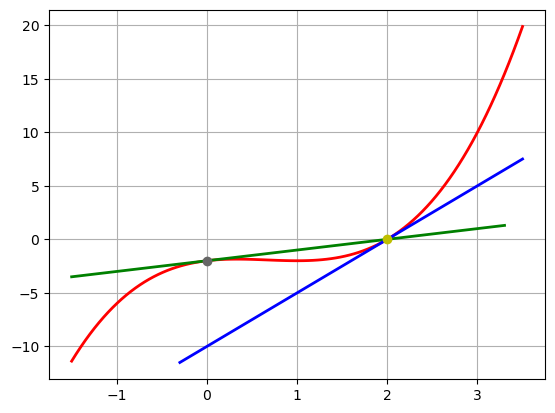

In [22]:
x = np.linspace(-1.5,3.5,100)
y = (x**2 + 1)*(x - 2)
plt.plot(x, y, lw=2, color='red')
x = np.linspace(-1.5,3.3,100)
y1 = x - 2
plt.plot(x, y1, lw=2, color='green')

x = np.linspace(-0.3,3.5,100)
y2 = 5*x - 10
plt.plot(x, y2, lw=2, color='blue')
plt.plot([0], [-2], 'o', color='0.4')
plt.plot([2], [0], 'o', color='y')
plt.grid(True)
plt.show()

### Пример  15: Составить уравнение касательной и нормали к кривой в точке. $M(1;-1)$. $x^{2}+2xy^{2}+3y^{4}=6$

In [56]:
x, y = symbols('x y')
f = x**2 +2*x*y**2 + 3*y**4 - 6

''' Точка касания '''
x0, y0 = 1, -1

''' Производная неявной функции в точке (х0;у0)'''
k = idiff(f,y,x).subs([(x,1),(y,-1)])
x1 = x0 + 1
y1 = y0 + k

''' Касательная '''
l = Line((x0,y0), (x1,y1))
l.equation()

-x/4 + y + 5/4

In [58]:
''' Нормаль '''
p = Point(x0,y0)
l.perpendicular_line(p).equation()

-x - y/4 + 3/4

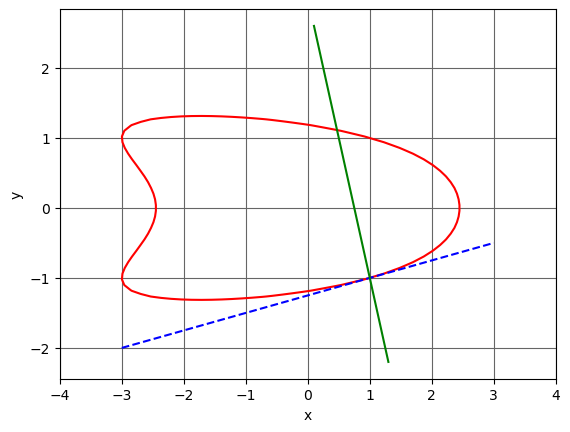

In [62]:
x = np.linspace(-4, 4, 50)
y = np.linspace(-2, 2, 50)

x, y = np.meshgrid(x, y)
f = x**2 + 2*x*y**2 + 3*y**4 - 6
plt.contour(x, y, f, 0, colors='r')
x = np.linspace(-3,3,50)
y2 = x/4 - 5/4

plt.plot(x,y2,'--',c='b')
x = np.linspace(0.1,1.3,50)
y3 = 3 - 4*x

plt.plot(x, y3, c='g')
plt.xlabel('x'); plt.ylabel('y')
plt.grid(True, linestyle='-', color='0.4')

### Пример  21: При каком значении параметра $a$ парабола $y = ax^2$ касается кривой $y = lnx$?

In [24]:
x, a, x0 = symbols('x а х0')

y1 = a*x**2
y2 = log(x)

y1_diff = diff(y1,x).subs(x,x0)
y2_diff = diff(y2,x).subs(x,x0)

y1_0 = y1.subs(x,x0)
y2_0 = y2.subs(x,x0)

solve([y1_0-y2_0, y1_diff-y2_diff], [x0, a])

[(exp(1/2), exp(-1)/2)]

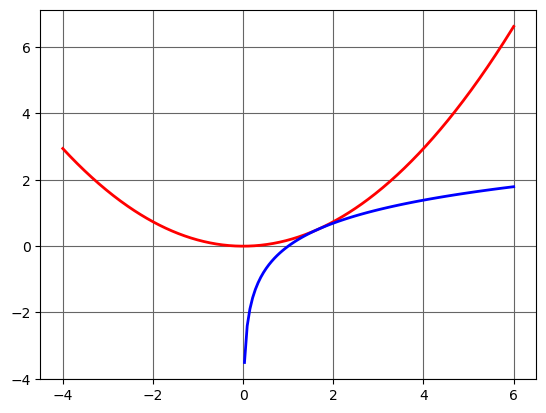

In [26]:
x = np.linspace(-4, 6, 500)
y = x**2/(2*np.exp(1))
plt.plot(x, y, lw=2, c='r')
x = np.linspace(0.03, 6, 100)
y = np.log(x)
plt.plot(x, y, lw=2, c='b')
plt.grid(True, linestyle='-', color='0.4')
plt.show()

Ответ: $a = \frac{1}{2e}$

### Пример  23: Исследовать на экстремум функцию $y = \sqrt[3]{x} \times lnx$.

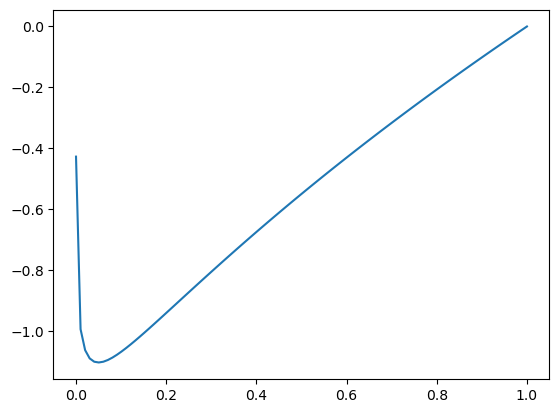

In [28]:
f = lambda x: (x**(1/3))*np.log(x)

x = np.linspace(0.0001,1,100)
y = f(x)
plt.plot(x, y)
plt.show()

In [33]:
res = minimize(f, 0.01)
print('xmin: %.4f y(x_min): %.3f' % (res.x, f(res.x)))

xmin: 0.0498 y(x_min): -1.104


In [34]:
res = minimize(f, 0.01)
print('xmin: %.4f y(x_min): %.3f' % (res.x, f(res.x)))

xmin: 0.0498 y(x_min): -1.104


### Пример  31: Найти производную функции $w = \frac{x^2}{2} + \frac{y^2}{9} - z^2$ в точке $A(1;2)$ по направлению радиус-вектора этой точки.

In [35]:
l = Point(2,3,1)

l_n = l.distance(Point(0,0,0))

cos_a = l.x/l_n
cos_b = l.y/l_n
cos_c = l.z/l_n

x,y,z = symbols('x у z')
w = x**2/2 + y**2/9 - z**2

w_x = diff(w,x).subs({x:2, y:3, z:1})
w_y = diff(w,y).subs({x:2, y:3, z:1})
w_z = diff(w,z).subs({x:2, y:3, z:1})

w_x = diff(w,x).subs([(x,2),(y,3),(z,1)])
w_y = diff(w,y).subs([(x,2),(y,3),(z,1)])
w_z = diff(w,z).subs([(x,2),(y,3),(z,1)])

w_l = w_x*cos_a + w_y*cos_b + w_z*cos_c
w_l

2*sqrt(14)/7

### Пример  40: Найти экстремумы функции $z = x^2 -4xy - 2y^2 + 8x$.

In [47]:
x, y = symbols('x y')
z = x**2 - 4*x*y - 2*y**2 + 8*x
cr_point, A, D = critical_points(z)
cr_point

[{x: -4/3, y: 4/3}]

Одна критическая точка

In [48]:
D0, A0 = suff_indic(A, D, cr_point[0])
D0, A0

(-24, 2)

$\Delta = -24 < 0$ - экстремума нет

### Пример  47: Функция спроса $D$ и предложения $S$ от цены $p$ имеют вид: $D(p) = 40 - 1,3p$, $S(p) = 20 + 1,2p$. Найти эластичность спроса в точке равновенсой цены.

In [50]:
p = symbols('р')
D = 40 - 1.3*p
S = 20 + 1.2*p
p0 = solve(D-S,p)
p0[0].n(2)

8.0

In [ ]:
Dprim = diff(D,p)
E = (p*Dprim/D).subs(p,p0[0])
E.n(3)

## Задачи для самостоятельного решения

### 1: Найти $ y' $ для функции $y = \frac{x^{2}-1}{x^{2}+1}$

In [20]:
x = sp.symbols('х')
y = (x**2-1)/(x**2+1)
sp.diff(y,x)

-2*х*(х**2 - 1)/(х**2 + 1)**2 + 2*х/(х**2 + 1)

In [19]:
sp.diff(y,x).simplify()

4*х/(х**2 + 1)**2

#### Ответ: 

$ - \frac{2x(x^{2}-1)}{(x^{2}+1)^{2}} + \frac{2x}{x^{2}+1}$

### 2: Найти вторую производную функции  $ y = xe^{x^{2}} $

In [30]:
x = sp.symbols('х')
y = x * sp.exp(x**2)
sp.diff(y,x)

2*х**2*exp(х**2) + exp(х**2)

#### Ответ: 

$ 2x^{2}e^{x^{2}+e^{x^{2}}} $

### 3: Найти $ y' $ для функции $ y = \frac{x^{2}}{1-x} $

In [26]:
x = sp.symbols('х')
y = (x**2)/(1-x)
sp.diff(y,x)

х**2/(1 - х)**2 + 2*х/(1 - х)

#### Ответ: 

$ \frac{x^{2}}{(1-x)^{2}}+\frac{2x}{1-x} $

### 4: Найти экстремумы функции $ z = x + y $ при ограничении: $ x^{2} + y^{2} = 9 $

In [47]:
from sympy import *
x, y, lam = symbols('x y lam')

f = x + y
g = x**2 + y**2 - 9

cr_point, D = critical_points_conditional(f, g)
cr_point

[{x: 3*sqrt(2)/2, y: 3*sqrt(2)/2, lam: -sqrt(2)/6},
 {x: -3*sqrt(2)/2, y: -3*sqrt(2)/2, lam: sqrt(2)/6}]

In [51]:
[D.subs(p) for p in cr_point]

[-12*sqrt(2), 12*sqrt(2)]

In [53]:
[f.subs(p) for p in cr_point]

[3*sqrt(2), -3*sqrt(2)]

#### Ответ: 

$ z_{min} = z(-1,342; 2,683) = -10,416 $ </br>
$ z_{max} = z(1,342; -2,683) = 16,416 $

## Индивидуальное задание

### Численное решение обыкновенных дифференциальных уравнений

Уравнения Лотки-Вольтерры

In [67]:
from numpy import linspace, array
from pylab import plot, xlabel, ylabel, legend, show

Определим функцию-вектор правых частей системы диф. уравнений, на вход она получает вектор неизвестных, время и управляющие параметры (константы). Нулевой элемент вектора является численностью жертв, а первый элемент - число хищников.

In [71]:
def f(r, t, alpha, beta, gamma, delta):
    x = r[0]
    y = r[1]
    fx = alpha*x - beta*x*y
    fy = gamma*x*y - delta*y
    return array([fx, fy], float)

Задаем эмпирические константы, шаг по времени, начальные условия $x_{0}$ и $y_{0}$. Определяем вектор неизвестных $r$.

In [72]:
a = 0.
b = 40.
N = 1000
h = (b-a)/N
alpha = 1.
beta = 0.5
gamma = 0.5
delta = 2.
x0 = 2.
y0 = 2.
time = linspace(a,b,N+1)
xpoints = []
ypoints = []
r = array([x0,y0], float)

Основной цикл по времени позволяет вычислить численность популяций в последовательные моменты времени согласно методу Рунге-Кутты 4-го порядка точности.

In [73]:
for t in time:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r, t, alpha, beta, gamma, delta)
    k2 = h*f(r+0.5*k1, t+0.5*k1, alpha, beta, gamma, delta)
    k3 = h*f(r+0.5*k2, t+0.5*k2, alpha, beta, gamma, delta)
    k4 = h*f(r+k3, t+h, alpha, beta, gamma, delta)
    r += (k1+2.*k2+2.*k3+k4)/6.

Для построения графика функции численности хищников и жертв от времени в окне браузера требуется вызвать "магическую команду" %matplotlib inline.

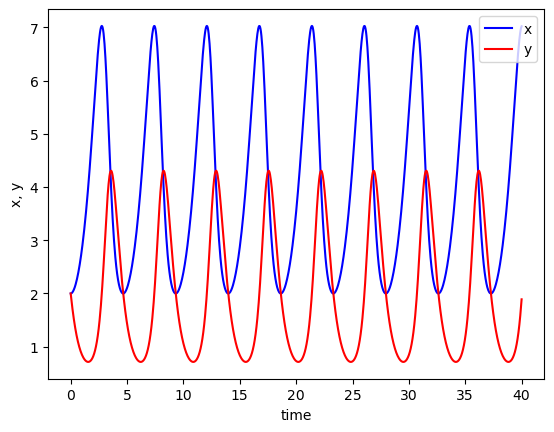

In [75]:
%matplotlib inline

plot(time, xpoints, 'b', label = 'x')
plot(time, ypoints, 'r', label = 'y')
xlabel('time')
ylabel('x, y')
legend()
show()